In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [48]:
sea_level = r"C:\Users\Admin\Desktop\Hanine\Portfolio\freecodecamp\epa-sea-level.csv"
df = pd.read_csv(sea_level)

print(df.head())


   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [53]:
print(df.head())

print(df.tail())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.

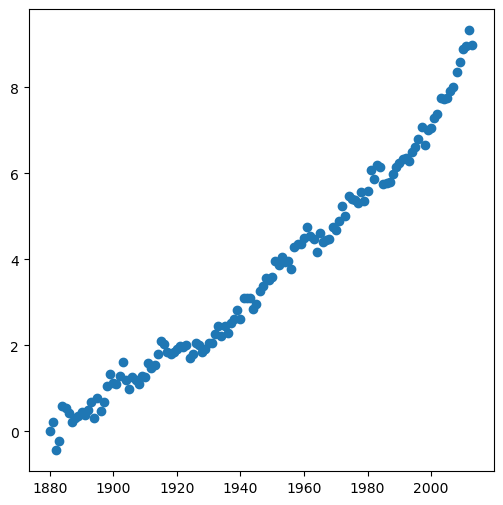

In [54]:
# Create scatter plot
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.scatter(x, y)


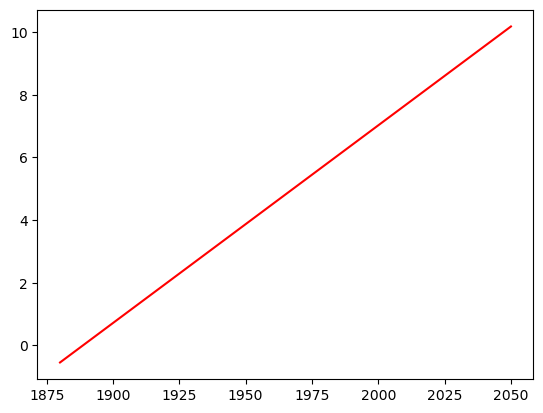

In [55]:
# Create first line of best fit

# get slope and intercept using linregress() function
slope, intercept, r_value, p_value, stderr = linregress(x, y)

# set new x, y for a line plot
x_pred = pd.Series([i for i in range(1880,2051)])
y_pred = slope*x_pred + intercept

# Create a line plot
plt.plot(x_pred, y_pred, 'r')

In [56]:
print(df.columns)
print(df.head())

Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [57]:
# another way to find slope (easiest way)
# use linregress function and assign as an object for later use
res = linregress(x, y)
res

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

Text(0.5, 1.0, 'Rise in Sea Level')

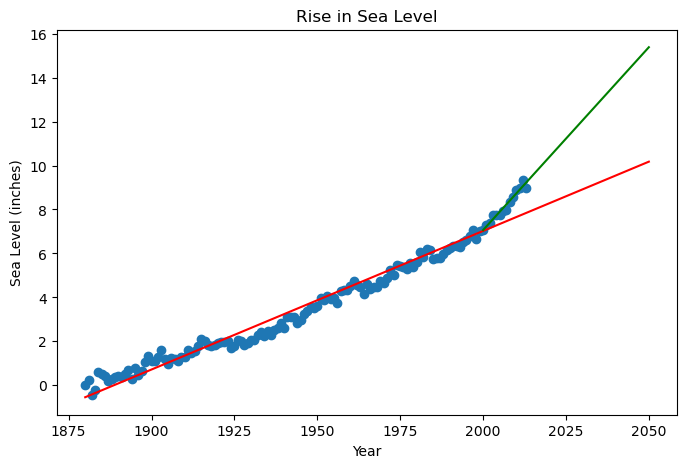

In [51]:
 # Create scatter plot
fig, ax = plt.subplots(figsize=(8,5))
scatter = plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

# Create first line of best fit
# Includes the whole data range
line_fit = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

# Create second line of best fit
# Fitting from year 2000 to most recent
mask = df["Year"] >= 2000
line_fit_recent = linregress(df[mask]["Year"], df[mask]["CSIRO Adjusted Sea Level"])

# Add labels and title
plt.plot(range(1880, 2051, 1), line_fit.slope*range(1880, 2051, 1)+line_fit.intercept, color="red")
plt.plot(range(2000, 2051, 1), line_fit_recent.slope*range(2000, 2051, 1)+line_fit_recent.intercept, color="green")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")



In [58]:
# Create second line of best fit

# set new range of data (from 2000 to the future)
df_forecast = df.loc[df['Year'] >= 2000]

# set new x, y for a new plot
x_forecast = df_forecast['Year']
y_forecast = df_forecast['CSIRO Adjusted Sea Level']

df_forecast

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [59]:
df = df[df['CSIRO Adjusted Sea Level'].notna()]

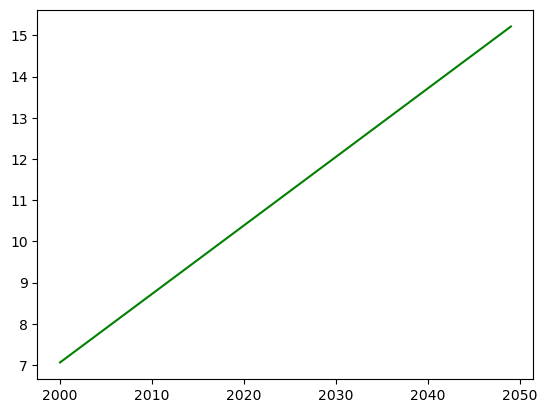

In [60]:
# get new slope + intercept using linregress() function (from new range of data set (from 2000))
slope, intercept, r_value, p_value, stderr = linregress(x_forecast, y_forecast)

# set new x, y for a line plot
x_pred2 = pd.Series([i for i in range(2000, 2050)])
y_pred2 = slope*x_pred2 + intercept

# Create a line plot
plt.plot(x_pred2, y_pred2, 'green')
